# IMPORTING THE LIBRARIES

In [1]:
# import all libraries
import requests
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# get the url link using request
url = 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/'

html = requests.get(url)
html

<Response [200]>

In [3]:
# get the html text
html_script = html.text
html_script[:1000]

# use beautiful soul to find the div and class tag
bsObj = BeautifulSoup(html_script)
page = bsObj.find('div', {'class':'SvQxP'})

# GET THE LINKS OF THE PAGE

In [4]:
# use a for loop to get the link for all the page
for tag in page.findAll('a'):
    print(tag.get('href'))

/New-York/New-York/3-beds-max-price-4nb+2000/
/New-York/New-York/3-beds-max-price-4nb+2000/?page=1
/New-York/New-York/3-beds-max-price-4nb+2000/?page=2
/New-York/New-York/3-beds-max-price-4nb+2000/?page=3
/New-York/New-York/3-beds-max-price-4nb+2000/?page=4
/New-York/New-York/3-beds-max-price-4nb+2000/?page=5
/New-York/New-York/3-beds-max-price-4nb+2000/?page=6
/New-York/New-York/3-beds-max-price-4nb+2000/?page=7
/New-York/New-York/3-beds-max-price-4nb+2000/?page=2


In [5]:
# use a for loop to create a link for all the page
link_url = []
base_url = "https://www.rentals.com"

for tag in page.findAll('a'):
    if tag['data-tag_item']!="next":
        link_url.append(base_url  + tag['href'])
        
link_url

['https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=1',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=2',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=3',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=4',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=5',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=6',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=7']

In [6]:
link_url.pop(-3)

'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=5'

In [7]:
link_url.pop(0)

'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/'

In [8]:
link_url

['https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=1',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=2',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=3',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=4',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=6',
 'https://www.rentals.com/New-York/New-York/3-beds-max-price-4nb+2000/?page=7']

**GET THE DATA IN THE FIRST LINK**

In [9]:
# get the data in the first link
link_page_url = link_url[1]
link_page_url
response = requests.get(link_page_url)
page_doc = BeautifulSoup(response.text, 'html.parser')

**GETTING THE INDIVIDUAL DATA**

In [10]:
# get the first 5 price for the first page
price = page_doc.find_all('div', {'data-tid':'listing-price'})
price = [info.text for info in price]
print(len(price))
price[:5]

30


['$1,700', '$1,675', '$1,500', '$1,600', '$1,725']

In [11]:
# get the first 5 adress for the first page
addr = page_doc.find_all('div', {'data-tid':'address'})
addr = [info.text for info in addr]
print(len(addr))
addr[:5]

30


['Room For Rent 615 West 136th Street, New York City, NY 10031',
 'Room For Rent 615 West 136th Street, New York City, NY 10031',
 'Room For Rent 3620 Broadway, New York City, NY 10031',
 'Room For Rent 205 West 109th Street, New York City, NY 10025',
 'Room For Rent 7 Eldridge Street, New York City, NY 10002']

In [12]:
# get the first 5 space for the first page
space = page_doc.find_all('span', {'data-tid':'beds-baths'})
space = [info.text for info in space]
print(len(space))
space[:5]

30


[' 3bd  1ba', ' 3bd  1ba', ' 3bd  1ba', ' 3bd  1ba', ' 3bd  1ba']

**WRITE THE FUNCTION TO ITERATE THROUGH**

In [13]:
# Use a function to iterate through all the page
def dataScrapper(page_url):
    response = requests.get(page_url)
    if response.status_code:
        page_doc = BeautifulSoup(response.text, 'html.parser')
        price = [info.text for info in page_doc.find_all('div', {'data-tid':'listing-price'})]
        addr = [info.text for info in page_doc.find_all('div', {'data-tid':'address'})]
        space = [info.text for info in page_doc.find_all('span', {'data-tid':'beds-baths'})]
    else:
        print('Not a valid page link')
    
    return (price, addr, space)

In [14]:
# create a dictionary
page_dict = {
    'Price': [],
    'Address': [],
    'Space': [] }

In [15]:
# use a for loop to get the data
for link in (link_url):
    data = dataScrapper(link)
    for pr, ad, sp in zip(data[0], data[1], data[2]):
        page_dict.get('Price').append(pr)
        page_dict.get('Address').append(ad)
        page_dict.get('Space').append(sp)

In [16]:
page_dict

{'Price': ['$2,000',
  '$1,725',
  '$1,725',
  '$2,000',
  '$1,825',
  '$1,725',
  '$1,675',
  '$1,175',
  '$1,800',
  '$1,975',
  '$1,500',
  '$1,850',
  '$1,500',
  '$1,825',
  '$1,250',
  '$1,800',
  '$1,750',
  '$1,725',
  '$1,350',
  '$1,375',
  '$1,775',
  '$1,150',
  '$1,750',
  '$1,550',
  '$1,750',
  '$1,775',
  '$1,725',
  '$1,800',
  '$1,575',
  '$1,725',
  '$1,700',
  '$1,675',
  '$1,500',
  '$1,600',
  '$1,725',
  '$1,900',
  '$1,675',
  '$1,925',
  '$2,000',
  '$1,750',
  '$1,450',
  '$1,775',
  '$1,825',
  '$1,525',
  '$1,725',
  '$1,925',
  '$2,000',
  '$1,750',
  '$1,425',
  '$1,825',
  '$1,100',
  '$1,910',
  '$1,275',
  '$1,775',
  '$1,450',
  '$1,400',
  '$1,750',
  '$1,875',
  '$1,950',
  '$1,825',
  '$1,775',
  '$1,925',
  '$1,700',
  '$1,650',
  '$1,700',
  '$1,725',
  '$1,675',
  '$1,750',
  '$1,150',
  '$1,750',
  '$1,525',
  '$1,450',
  '$1,425',
  '$1,325',
  '$1,575',
  '$1,700',
  '$1,700',
  '$1,300',
  '$1,480',
  '$1,350',
  '$2,000',
  '$1,010+',
  '$1,

In [17]:
pd.DataFrame(page_dict)

,Price,Address,Space
0,"$2,000","526 W 211 Th St, New York, NY 10034",3bd 1ba
1,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba
2,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba
3,"$2,000","Room For Rent 356 West 39th Street, New York C...",3bd 1ba
4,"$1,825","Room For Rent 81 Olive Street, New York City, ...",3bd 1ba
...,...,...,...
162,"$2,000","34 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba
163,"$1,750","116 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba
164,"$1,950","23 25 Colleen St Unit 1 R, Newark, NJ 07106",3bd 1.5ba
165,"$1,895","199 Smith St Unit 2, Newark, NJ 07106",3bd 1ba


In [18]:
# save the data to a csv file
data = pd.DataFrame(page_dict)
data.to_csv('Housing_prices.csv', index=False)

In [19]:
# import the data using pandas and run
page_dict = pd.read_csv("Housing_prices.csv")
page_dict

,Price,Address,Space
0,"$2,000","526 W 211 Th St, New York, NY 10034",3bd 1ba
1,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba
2,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba
3,"$2,000","Room For Rent 356 West 39th Street, New York C...",3bd 1ba
4,"$1,825","Room For Rent 81 Olive Street, New York City, ...",3bd 1ba
...,...,...,...
162,"$2,000","34 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba
163,"$1,750","116 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba
164,"$1,950","23 25 Colleen St Unit 1 R, Newark, NJ 07106",3bd 1.5ba
165,"$1,895","199 Smith St Unit 2, Newark, NJ 07106",3bd 1ba


In [20]:
# split column and add new columns to page_dict
page_dict[['Street', 'City', 'City Postal Code']] = page_dict['Address'].str.split(',', expand=True)
# display the dataframe
page_dict

,Price,Address,Space,Street,City,City Postal Code
0,"$2,000","526 W 211 Th St, New York, NY 10034",3bd 1ba,526 W 211 Th St,New York,NY 10034
1,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba,Room For Rent 7 Eldridge Street,New York City,NY 10002
2,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba,Room For Rent 7 Eldridge Street,New York City,NY 10002
3,"$2,000","Room For Rent 356 West 39th Street, New York C...",3bd 1ba,Room For Rent 356 West 39th Street,New York City,NY 10018
4,"$1,825","Room For Rent 81 Olive Street, New York City, ...",3bd 1ba,Room For Rent 81 Olive Street,New York City,NY 11211
...,...,...,...,...,...,...
162,"$2,000","34 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba,34 Norwood St Unit 1,Newark,NJ 07106
163,"$1,750","116 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba,116 Norwood St Unit 1,Newark,NJ 07106
164,"$1,950","23 25 Colleen St Unit 1 R, Newark, NJ 07106",3bd 1.5ba,23 25 Colleen St Unit 1 R,Newark,NJ 07106
165,"$1,895","199 Smith St Unit 2, Newark, NJ 07106",3bd 1ba,199 Smith St Unit 2,Newark,NJ 07106


In [21]:
# separate the space column to bathroom and bedroom
bedroom  =[]
bathroom =[]
for i in page_dict.Space:
  j = i.split(' ')
  #print(j)
  bd = j[1]
  bth = j[3]
  bedroom.append(bd)
  bathroom.append(bth)

page_dict['Bathroom'] = bathroom
page_dict['bedroom'] = bedroom
page_dict

,Price,Address,Space,Street,City,City Postal Code,Bathroom,bedroom
0,"$2,000","526 W 211 Th St, New York, NY 10034",3bd 1ba,526 W 211 Th St,New York,NY 10034,1ba,3bd
1,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba,Room For Rent 7 Eldridge Street,New York City,NY 10002,1ba,3bd
2,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba,Room For Rent 7 Eldridge Street,New York City,NY 10002,1ba,3bd
3,"$2,000","Room For Rent 356 West 39th Street, New York C...",3bd 1ba,Room For Rent 356 West 39th Street,New York City,NY 10018,1ba,3bd
4,"$1,825","Room For Rent 81 Olive Street, New York City, ...",3bd 1ba,Room For Rent 81 Olive Street,New York City,NY 11211,1ba,3bd
...,...,...,...,...,...,...,...,...
162,"$2,000","34 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba,34 Norwood St Unit 1,Newark,NJ 07106,1ba,3bd
163,"$1,750","116 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba,116 Norwood St Unit 1,Newark,NJ 07106,1ba,3bd
164,"$1,950","23 25 Colleen St Unit 1 R, Newark, NJ 07106",3bd 1.5ba,23 25 Colleen St Unit 1 R,Newark,NJ 07106,1.5ba,3bd
165,"$1,895","199 Smith St Unit 2, Newark, NJ 07106",3bd 1ba,199 Smith St Unit 2,Newark,NJ 07106,1ba,3bd


In [22]:
#drop any rows that have 3bd 1.5ba in the space column
page_dict = page_dict[page_dict.Bathroom != '1.5ba']

In [23]:
page_dict

,Price,Address,Space,Street,City,City Postal Code,Bathroom,bedroom
0,"$2,000","526 W 211 Th St, New York, NY 10034",3bd 1ba,526 W 211 Th St,New York,NY 10034,1ba,3bd
1,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba,Room For Rent 7 Eldridge Street,New York City,NY 10002,1ba,3bd
2,"$1,725","Room For Rent 7 Eldridge Street, New York City...",3bd 1ba,Room For Rent 7 Eldridge Street,New York City,NY 10002,1ba,3bd
3,"$2,000","Room For Rent 356 West 39th Street, New York C...",3bd 1ba,Room For Rent 356 West 39th Street,New York City,NY 10018,1ba,3bd
4,"$1,825","Room For Rent 81 Olive Street, New York City, ...",3bd 1ba,Room For Rent 81 Olive Street,New York City,NY 11211,1ba,3bd
...,...,...,...,...,...,...,...,...
161,"$2,000","286 Halsted St, East Orange, NJ 07018",3bd 1ba,286 Halsted St,East Orange,NJ 07018,1ba,3bd
162,"$2,000","34 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba,34 Norwood St Unit 1,Newark,NJ 07106,1ba,3bd
163,"$1,750","116 Norwood St Unit 1, Newark, NJ 07106",3bd 1ba,116 Norwood St Unit 1,Newark,NJ 07106,1ba,3bd
165,"$1,895","199 Smith St Unit 2, Newark, NJ 07106",3bd 1ba,199 Smith St Unit 2,Newark,NJ 07106,1ba,3bd


In [24]:
# check for missing value
page_dict.isnull().sum()

Price               0
Address             0
Space               0
Street              0
City                0
City Postal Code    0
Bathroom            0
bedroom             0
dtype: int64

In [25]:
# create a default color of visualization
base_color = sb.color_palette()[0]

In [26]:
# count plot function to avoid repition

def count_plot(df,y,hue,order,palette):
    
    '''
    A count plot function.
    '''
    plt.figure(figsize = [12, 8]) 
    sb.countplot(data = page_dict, y = y, x=None, hue=hue, order=order, palette=palette, color=base_color)
    plt.title('A value count of ' + y + ' distribution', fontsize=10, fontweight='bold')
    plt.ylabel(y, fontsize=10, fontweight='bold')
    plt.xlabel('Count'.title(), fontsize = 10, fontweight = 'bold')
    plt.show();

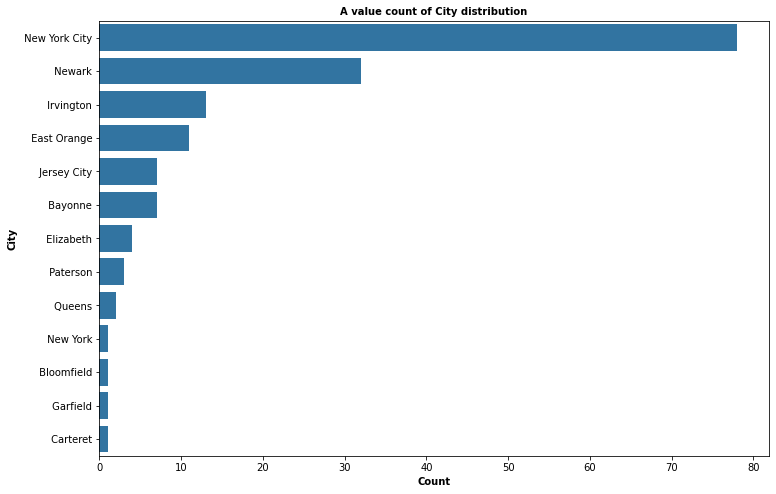

In [27]:
count_plot(df=page_dict, y='City', hue=None, palette=None, order=page_dict['City'].value_counts().index)

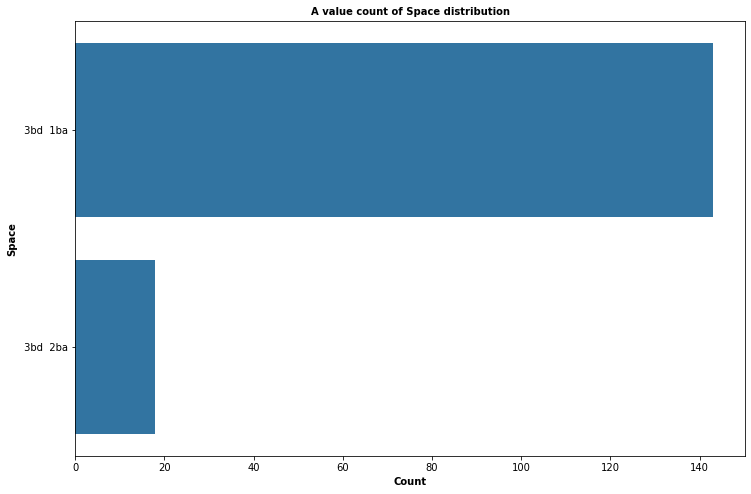

In [28]:
count_plot(df=page_dict, y='Space', hue=None, palette=None, order=page_dict['Space'].value_counts().index)

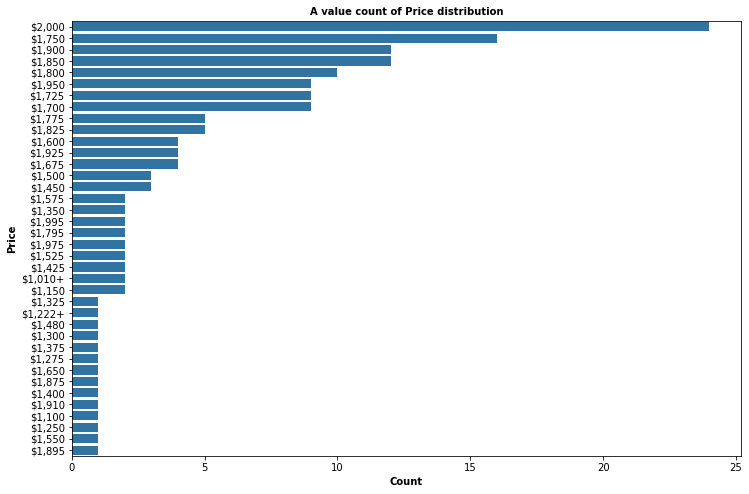

In [29]:
count_plot(df=page_dict, y='Price', hue=None, palette=None, order=page_dict['Price'].value_counts().index)

In [30]:
# change price from string to int
New_Price=[]

for Price in page_dict['Price']:
  Price = Price[1::]
  Price = Price.replace(',','')
  Price = Price.replace('+','')
  print(Price)
  New_Price.append(int(Price))

page_dict['New price']= New_Price

2000
1725
1725
2000
1825
1725
1675
1800
1975
1500
1850
1500
1825
1250
1800
1750
1725
1350
1375
1775
1150
1750
1550
1750
1775
1725
1800
1575
1725
1700
1675
1500
1600
1725
1900
1675
1925
2000
1750
1450
1775
1825
1525
1725
1925
2000
1750
1425
1825
1100
1910
1275
1775
1450
1400
1750
1875
1950
1825
1775
1925
1700
1650
1700
1725
1675
1750
1150
1750
1525
1450
1425
1325
1575
1700
1700
1300
1480
1350
2000
1010
1222
1010
1700
1900
2000
1850
2000
1850
1900
1950
1900
1850
1995
1800
1900
2000
2000
1950
1900
1800
2000
2000
1750
1600
1950
2000
2000
2000
2000
2000
1800
2000
2000
2000
1900
1750
1850
1850
2000
1850
1750
1900
1795
1850
1600
1995
1700
1800
1950
1950
1850
1800
2000
1795
1600
1800
1850
1750
1700
1850
1925
1750
1950
2000
1975
1700
1750
1900
1900
1750
1900
1950
1800
1850
1900
2000
2000
1750
1895
1950


In [31]:
# display the new column
page_dict['New price']

0      2000
1      1725
2      1725
3      2000
4      1825
       ... 
161    2000
162    2000
163    1750
165    1895
166    1950
Name: New price, Length: 161, dtype: int64

In [32]:
# display the dataframe column
page_dict.columns

Index(['Price', 'Address', 'Space', 'Street', 'City', 'City Postal Code',
       'Bathroom', 'bedroom', 'New price'],
      dtype='object')

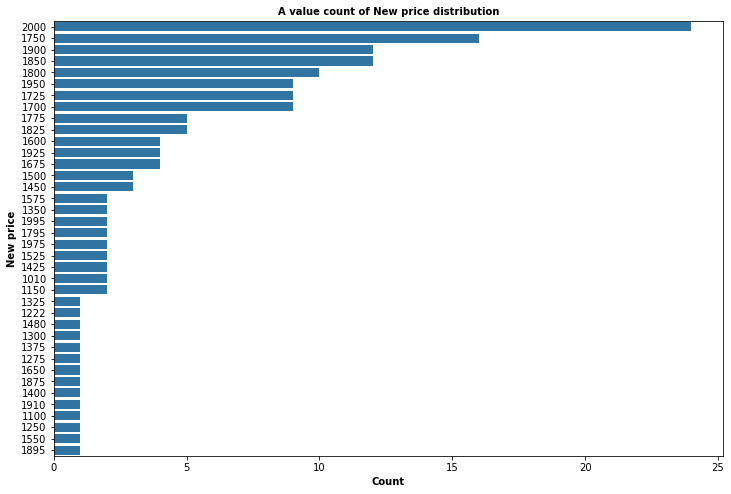

In [33]:
# display the count plot of the new column
count_plot(df=page_dict, y='New price', hue=None, palette=None, order=page_dict['New price'].value_counts().index)

<AxesSubplot:ylabel='Frequency'>

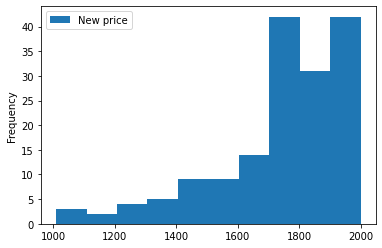

In [34]:
# display the dataframe column
page_dict.columns
# distribution of new price column
page_dict.plot(kind='hist')

> This graph is a bimodal distribution, with the price peaking between 1700 to 1800.

In [35]:
# bar plot function to reduce code repetition
def bar_plot(x,y,xlabel,ylabel,hue=None,palette=None):
    '''
    A bar plot function.
    '''
    plt.figure(figsize = [10, 6])
    sb.barplot(x,y,data = page_dict, hue=hue, palette=palette, color = base_color)
    plt.xticks(rotation = 90)
    plt.xlabel(xlabel, fontsize = 10, fontweight = 'bold')
    plt.ylabel(ylabel, fontsize = 10, fontweight = 'bold')
    plt.title('Plot between ' + xlabel+ ' and ' +ylabel, fontsize = 10, fontweight = 'bold')
    plt.show();

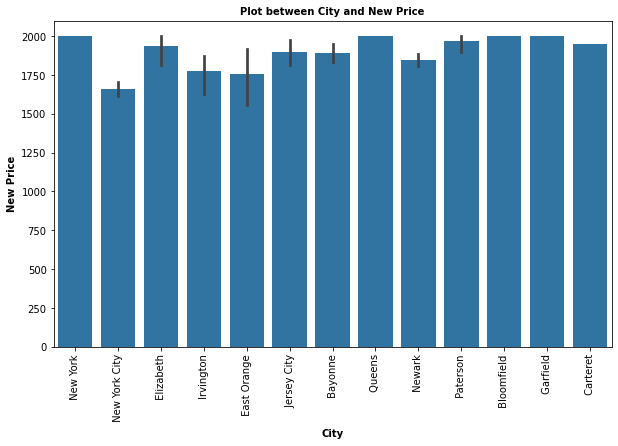

In [36]:
bar_plot(page_dict['City'], page_dict['New price'], 'City', 'New Price', hue=None, palette=None)

> New york has the highest price among other cities.

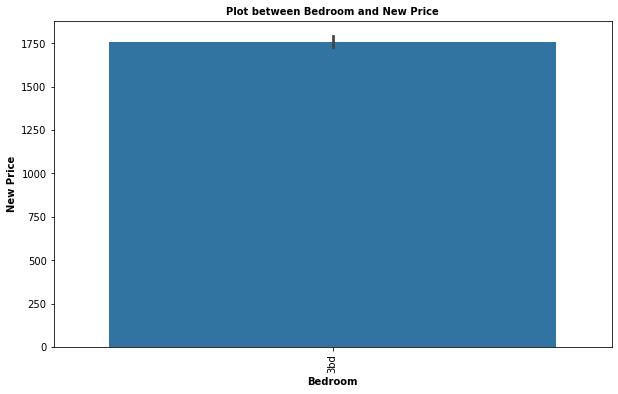

In [37]:
bar_plot(page_dict['bedroom'], page_dict['New price'], 'Bedroom', 'New Price', hue=None, palette=None)

> This plot shows that all apartments has 3 bedroom.

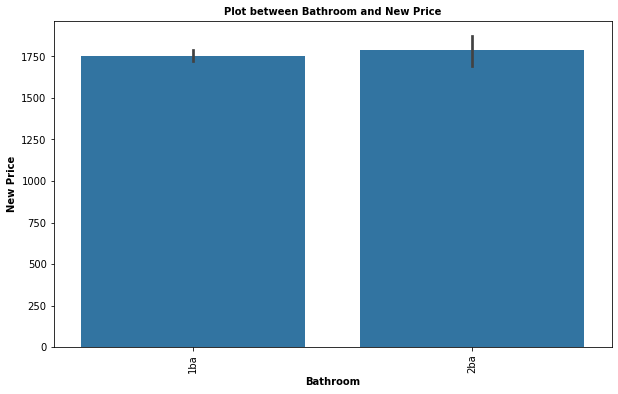

In [38]:
bar_plot(page_dict['Bathroom'], page_dict['New price'], 'Bathroom', 'New Price', hue=None, palette=None)

> This plot depicts that some apartment have 1 bathroom and others 2 bathroom for relatively same price.

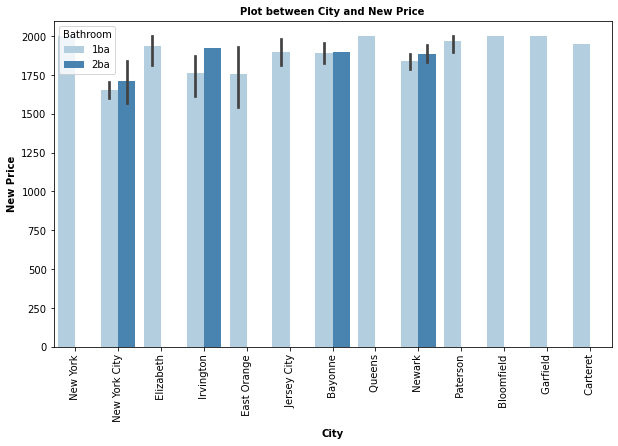

In [39]:
bar_plot(page_dict['City'], page_dict['New price'], 'City', 'New Price', hue='Bathroom', palette='Blues')

> This graph depicts that only 4 cities have 2 bathrooms and others have 1 bathroom.